# Inspection of WEAVE first-light supercubes: resolution comparison

## 1. Initialisation

### Imports

In [1]:
%matplotlib ipympl
from matplotlib import pyplot as plt
from matplotlib import colors
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy import constants as c

## 2. Data analysis

### Read datacubes:

In [2]:
class Datacube(object):
    def __init__(self, filename, label):
        self.hdu = fits.open(filename)
        self.label = label
        
        self.wcs = WCS(self.hdu[1].header)
        self.wavelength = self.wcs.spectral.pixel_to_world(np.arange(self.hdu[1].data.shape[0])).to_value(u.Angstrom)
        #self.ngc7318a_x, self.ngc7318a_y = self.wcs.celestial.world_to_pixel(SkyCoord('22h35m56.7s', '+33d57m56s'))
        #self.ngc7318b_x, self.ngc7318b_y = self.wcs.celestial.world_to_pixel(SkyCoord('22h35m58.4s', '+33d57m57s'))
        self.roi_x, self.roi_y = self.wcs.celestial.world_to_pixel(SkyCoord('22h36m00.08s', '+33d58m28.64s'))

        self.sensitivity = self.hdu[5].data
        self.roi_SED = np.mean(self.hdu[1].data[:, int(self.roi_y-5):int(self.roi_y+5), int(self.roi_x-5):int(self.roi_x+5)], axis=(1, 2)) * self.sensitivity
        #self.ngc7318a = np.mean(self.hdu[1].data[:, int(self.ngc7318a_y-15):int(self.ngc7318a_y+15), int(self.ngc7318a_x-15):int(self.ngc7318a_x+15)], axis=(1, 2)) * self.sensitivity
        #self.ngc7318b = np.mean(self.hdu[1].data[:, int(self.ngc7318b_y-15):int(self.ngc7318b_y+15), int(self.ngc7318b_x-15):int(self.ngc7318b_x+15)], axis=(1, 2)) * self.sensitivity
        #self.sky = np.sum(self.hdu[3].data - self.hdu[1].data, axis=(1, 2)) * self.sensitivity / np.count_nonzero(self.hdu[6].data > 0)


In [3]:
LR_red = Datacube('data/supercube_2963102-001.fit', 'LR (red)')
LR_blue = Datacube('data/supercube_2963103-002.fit', 'LR (blue)')
HR_red = Datacube('data/supercube_2963269.fit', 'HR (red)')
HR_blue = Datacube('data/supercube_2963270.fit', 'HR (blue)')

### Subtract continuum:

In [4]:
lines = {}
lines['OII_3726'] = [3726.032, 3717.0, 3737.0]
lines['OII_3729'] = [3728.815, 3717.0, 3737.0]
lines['NeIII_3869'] = [3869.060, 3859.0, 3879.0]
lines['H_delta'] = [4101.734, 4092.0, 4111.0]
lines['H_gamma'] = [4340.464, 4330.0, 4350.0]
lines['OIII_4363'] = [4363.210, 4350.0, 4378.0]
lines['H_beta'] = [4861.325, 4851.0, 4871.0, 4760, 4820, 4900, 4960]
lines['OIII_4959'] = [4958.911, 4949.0, 4969.0]
lines['OIII_5007'] = [5006.843, 4997.0, 5017.0, 4000, 4060, 5100, 5160]
lines['HeI_5876'] = [5875.67, 5866.0, 5886.0]
lines['OI_6300'] = [6300.304, 6290.0, 6310.0]
lines['NII_6548'] = [6548.040, 6533.0, 6553.0]
lines['H_alpha'] = [6562.800, 6550., 6575., 6470., 6530., 6600., 6660.]
lines['NII_6584'] = [6583.460, 6573.0, 6593.0]
lines['SII_6717'] = [6716.440, 6704.0, 6724.0, 6600, 6660, 6800, 6860]
lines['SII_6731'] = [6730.810, 6724.0, 6744.0]
lines['CaT-a'] = [8500.36, np.nan, np.nan]
lines['CaT-b'] = [8544.44, np.nan, np.nan]
lines['CaT-c'] = [8664.52, np.nan, np.nan]

# NGC 7318
redshift_a = 6630/3e5
redshift_b = 5774/3e5

#wavelength_bins = np.array(lines['H_alpha'])
#indices_Ha_a = np.searchsorted(wavelength, wavelength_bins*(1+redshift_a))
#indices_Ha_b = np.searchsorted(wavelength, wavelength_bins*(1+redshift_b))


[1610 1732 1912 2035 1765 1984]
[4581 4581 4581 4581 4581 4581]
[6896 7507 8409 9022 7672 8766]
[8101 8101 8101 8101 8101 8101]
[0 0 0 0 0 0]
[2384 2506 2697 2820 2565 2727]
[0 0 0 0 0 0]
[1467 2078 3033 3647 2374 3184]
[0 0 0 0 0 0]
[ 834  957 3106 3229 2861 3028]
[0 0 0 0 0 0]
[   0    0 5078 5691 3853 4688]
[1875 1997 2321 2444 2077 2301]
[4581 4581 4581 4581 4581 4581]
[8221 8832 9101 9101 9101 9101]
[8101 8101 8101 8101 8101 8101]


/tmp/ipykernel_14917/334604061.py:31: RuntimeWarning: Mean of empty slice
  blue_side = np.nanmean(cube.roi_SED[wavelength_indices[0]:wavelength_indices[1]])
/home/yago/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/tmp/ipykernel_14917/334604061.py:42: RuntimeWarning: All-NaN slice encountered
  norm = (np.nanmax(line_profile) + p100)/2


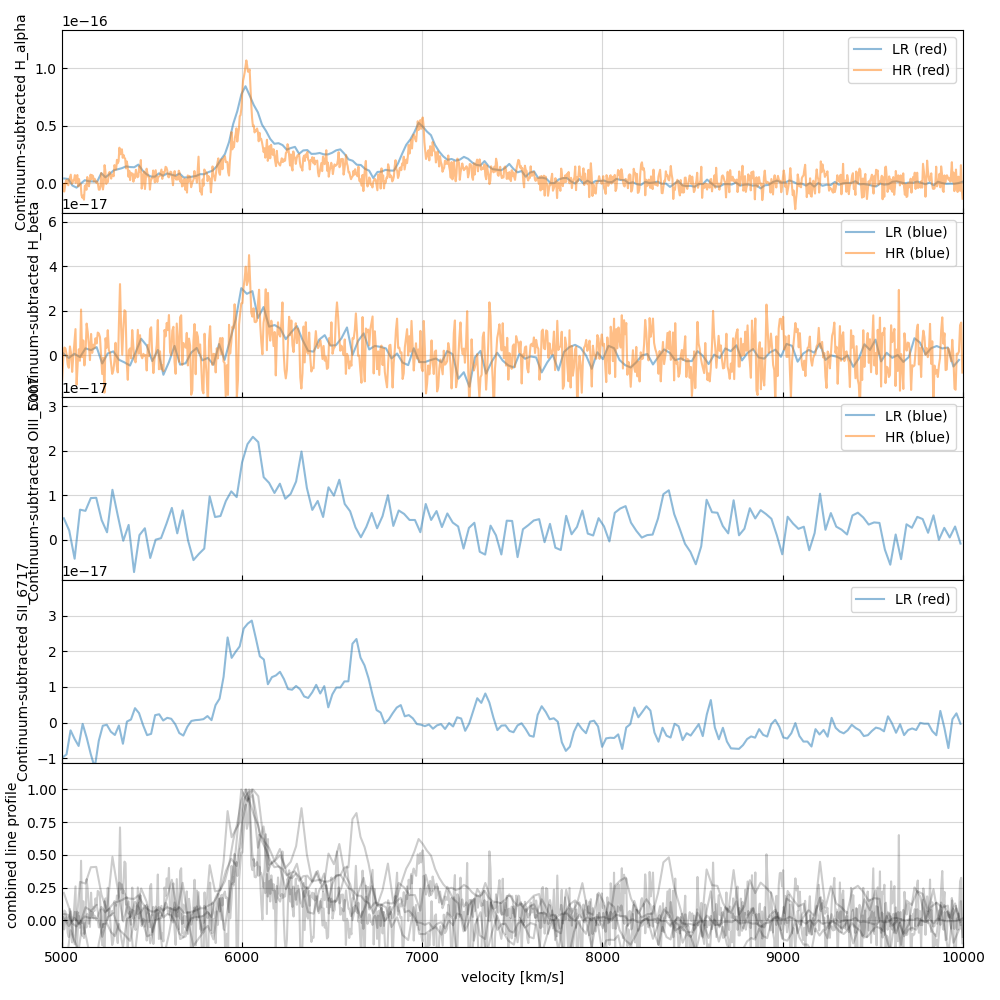

In [5]:
plt.close('spectra')
fig = plt.figure('spectra', figsize=(10, 10))
axes = fig.subplots(nrows=5, ncols=1, squeeze=False,
                    sharex=True, sharey=False,
                    gridspec_kw={'hspace': 0, 'wspace': 0}
                   )

def plot_line(line, axes, row, vel_min, vel_max):
    ax = axes[row, 0]
    ax.set_ylabel(f'Continuum-subtracted {line}')

    line_centre = lines[line][0]
    blue_continuum_min = lines[line][3]*(1+redshift_b)
    blue_continuum_max = lines[line][4]*(1+redshift_b)
    red_continuum_min = lines[line][5]*(1+redshift_a)
    red_continuum_max = lines[line][6]*(1+redshift_a)
    #ax.set_xlim(blue_continuum_min, red_continuum_max)
    #ax.set_xlim(-1500, 1500)
    #ax.axvline(6630)
    #ax.axvline(5774)

    sigma = 0.
    maximum_intensity = 0.
    for cube in [LR_red, LR_blue, HR_red, HR_blue]:
        wavelength_indices = np.searchsorted(
            cube.wavelength,
            [blue_continuum_min, blue_continuum_max, red_continuum_min, red_continuum_max,
             line_centre*(1+vel_min/3e5), line_centre*(1+vel_max/3e5)])
        print(wavelength_indices)
        if wavelength_indices[5] > wavelength_indices[4]:
            blue_side = np.nanmean(cube.roi_SED[wavelength_indices[0]:wavelength_indices[1]])
            red_side = np.nanmean(cube.roi_SED[wavelength_indices[2]:wavelength_indices[3]])
            continuum = (red_side+blue_side)/2
            velocity = (cube.wavelength[wavelength_indices[4]:wavelength_indices[5]]/line_centre - 1)*3e5
            line_profile = cube.roi_SED[wavelength_indices[4]:wavelength_indices[5]] - continuum
            p16, p84, p100 = np.nanpercentile(line_profile,  [16, 84, 100])
            sigma = max(sigma, p84-p16)
            maximum_intensity = max(maximum_intensity, p100)
            ax.plot(velocity, line_profile, label=cube.label, alpha=.5)
            #ax.plot([blue_continuum_min, blue_continuum_max], [blue_side-continuum, blue_side-continuum], 'bo-')
            #ax.plot([red_continuum_min, red_continuum_max], [red_side-continuum, red_side-continuum], 'ro-')
            norm = (np.nanmax(line_profile) + p100)/2
            axes[-1, 0].plot(velocity, line_profile/norm, 'k-', alpha=.2)

    #ax.set_ylim(1.2*minimum_intensity, maximum_intensity-.2*minimum_intensity)
    ax.set_ylim(-sigma, maximum_intensity+sigma)
    ax.legend()


vel_min = 5000
vel_max = 10000
plot_line('H_alpha', axes, 0, vel_min, vel_max)
plot_line('H_beta', axes, 1, vel_min, vel_max)
plot_line('OIII_5007', axes, 2, vel_min, vel_max)
plot_line('SII_6717', axes, 3, vel_min, vel_max)

axes[-1, 0].set_ylabel(r'combined line profile')
axes[-1, 0].set_ylim(-.2, 1.2)

axes[-1, 0].set_xlabel(r'velocity [km/s]')
axes[-1, 0].set_xlim(vel_min, vel_max)

for ax in axes.flatten():
    ax.tick_params(which='both', direction='in')
    ax.grid(alpha=.5)
fig.set_tight_layout(True)
plt.show()

In [6]:
3e5/50

6000.0